In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [3]:
print(df.columns)

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')


In [4]:
print(df.shape)

(750000, 9)


In [ ]:
# Looking over calorie distribution
df['Calories'].describe()

count    750000.000000
mean         88.282781
std          62.395349
min           1.000000
25%          34.000000
50%          77.000000
75%         136.000000
max         314.000000
Name: Calories, dtype: float64

In [6]:
df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


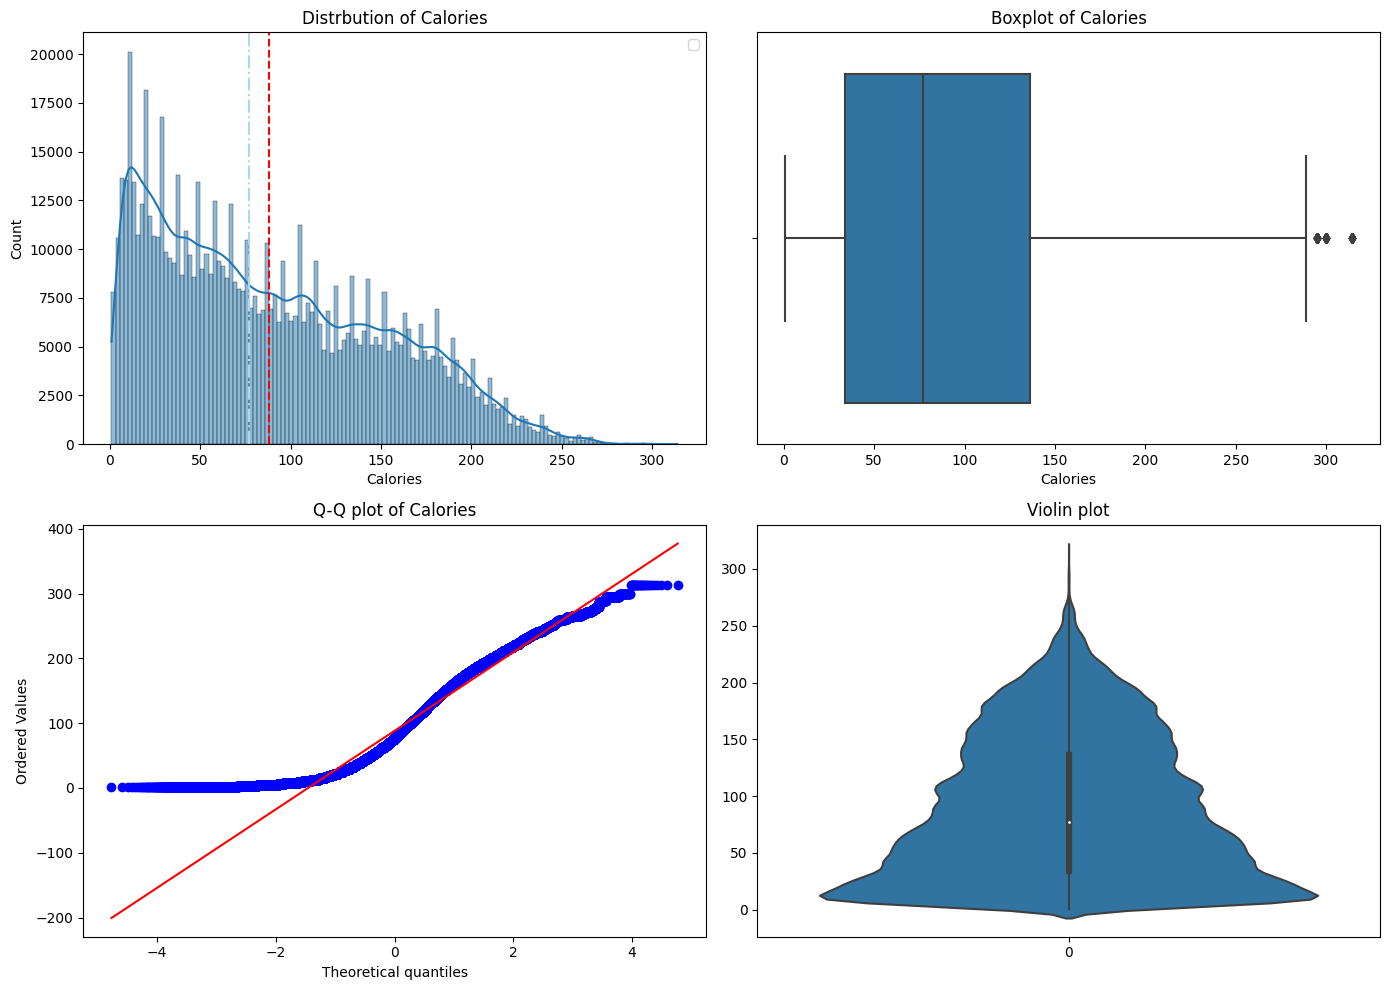

Shapiro Wilks-Test result: Statistics 0.9432 P-Value: 0.0000
Skewness 0.5392
Kurtosis -0.6895
Shapiro: Distrbution does not follow a normal distrbution
Skeweness: Distrbution is moderately skewed
Distrbution is skewed right


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 750000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#I'd want to know the distribution of the set to more accurlately standardize it


def analyze_distrbution(df, column_name):
    """
    Args: Pandas Dataframe and column name
    Returns: Plot and Disbtribution of graphs
    """
    fig, axes = plt.subplots(2,2, figsize=(14,10))
    # Histogram 
    sns.histplot(df[column_name], kde=True, ax=axes[0,0])
    axes[0,0].axvline(df[column_name].mean(), linestyle='--',color='red')
    axes[0,0].axvline(df[column_name].median(), linestyle='-.', color='lightblue')
    axes[0,0].set_title(f'Distrbution of {column_name}')
    axes[0,0].legend()

    #Box plot 
    sns.boxplot(x=df[column_name],ax=axes[0,1])
    axes[0,1].set_title(f'Boxplot of {column_name}')

    #Quantile-Quantile Plot 
    stats.probplot(df[column_name],plot=axes[1,0])
    axes[1,0].set_title(f'Q-Q plot of {column_name}')

    #Violin plot from seaborn
    sns.violinplot(df[column_name],ax=axes[1,1])
    axes[1,1].set_title(f'Violin plot')

    #Layout Cosmetics
    plt.tight_layout()
    plt.show()

    #Statistical inferences
    #shapiro infers null hypothesis is a Gauss distrbution
    stat, p_value = shapiro(df[column_name])

    #Skewness
    skewness = df[column_name].skew()

    #Kurtosis, how many outliers
    kurtosis = df[column_name].kurt()

    print(f'Shapiro Wilks-Test result: Statistics {stat:.4f} P-Value: {p_value:.4f}')
    print(f'Skewness {skewness:.4f}')
    print(f'Kurtosis {kurtosis:.4f}')

    #Breaking down analysis
    if p_value > 0.05:
        print("Shapiro: Distrbution follows a normal distrbution")
    else:
        print("Shapiro: Distrbution does not follow a normal distrbution")

    if -0.5 <= skewness <= 0.5:
        print("Skewness: Normal Distribution")
    elif -1 < skewness < -0.5 or 0.5 < skewness < 1 : # 
        print("Skeweness: Distrbution is moderately skewed")
        if skewness < 0:
            print("Distrbution is skewed left")
        else:
            print("Distrbution is skewed right")
    else:
        print("Skeweness: Distrbution is heavily skewed")
        if skewness < 0:
            print("Distrbution is skewed left")
        else:
            print("Distrbution is skewed right")
        
def main():
    column_name = 'Calories'
    analyze_distrbution(df, column_name)

main()

In [8]:
#Drop id column
df.drop(['id'], axis=1, inplace=True)

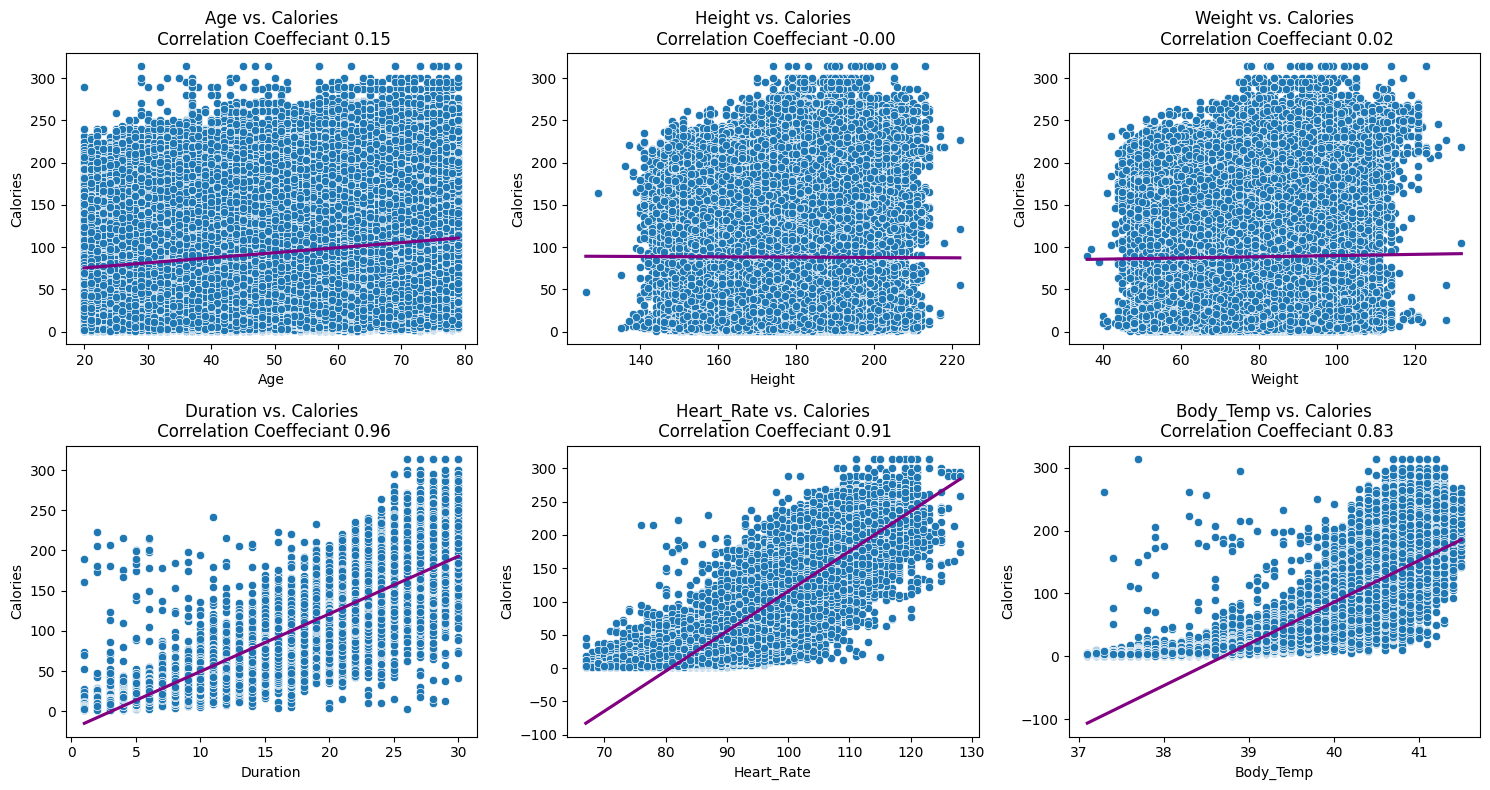

In [9]:
# Displays a scatter plot of each variable besides male and female
target_column = 'Calories'
numeric_columns = df.select_dtypes(include=[np.number]).columns
columns_to_plot = [column for column in numeric_columns if column != target_column]

#Setting up subplots
n_columns = 3 
n_rows = (len(columns_to_plot) - 1 + n_columns) // n_columns

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 4 * n_rows))

axes = axes.flatten() if n_rows > 1 or n_columns > 1 else [axes]

#Creating scatterplots
for i, column in enumerate(columns_to_plot):

    sns.scatterplot(x=df[column], y = df[target_column], ax = axes[i])
    sns.regplot(x=df[column], y=df[target_column], ax = axes[i], scatter=False, line_kws= {'color': 'purple'})

    corr = df[column].corr(df[target_column])
    axes[i].set_title(f'{column} vs. {target_column}\n Correlation Coeffeciant {corr:.2f}')
    axes[i].set_ylabel(f'{target_column}')
    axes[i].set_xlabel(f'{column}')

#Hide any other subplots 
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

# Analysis

Greatest correlation is duration, heart_rate, body temperature.
Age, height, weight don't correlate probably drop

Calories skewed to the right in this distribution.

In [10]:
# Investigating Sex-based insights

unique_values = df['Sex'].unique()

print(f'Unique Values: {unique_values}')
print(f'Number of unique values: {len(unique_values)}')

Unique Values: ['male' 'female']
Number of unique values: 2


In [ ]:
# Binary Encoding Sex column (1 = Male, 0 = Female)

df.loc[df['Sex'] == 'male', "Sex"] = 1
df.loc[df['Sex'] == 'female', "Sex"] = 0

df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,36,189.0,82.0,26.0,101.0,41.0,150.0
1,0,64,163.0,60.0,8.0,85.0,39.7,34.0
2,0,51,161.0,64.0,7.0,84.0,39.8,29.0
3,1,20,192.0,90.0,25.0,105.0,40.7,140.0
4,0,38,166.0,61.0,25.0,102.0,40.6,146.0
...,...,...,...,...,...,...,...,...
749995,1,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,0,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,1,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,1,45,182.0,91.0,17.0,102.0,40.3,109.0


In [ ]:
df.drop(['Age', 'Height', 'Weight'], axis=1, inplace=True) # drop age, height and weight column

In [13]:
df['Sex'] = df['Sex'].astype(int)
print(df['Sex'].dtype)
df.head()

int64


,Sex,Duration,Heart_Rate,Body_Temp,Calories
0,1,26.0,101.0,41.0,150.0
1,0,8.0,85.0,39.7,34.0
2,0,7.0,84.0,39.8,29.0
3,1,25.0,105.0,40.7,140.0
4,0,25.0,102.0,40.6,146.0


In [14]:
df['Sex'].value_counts()

Sex
0    375721
1    374279
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

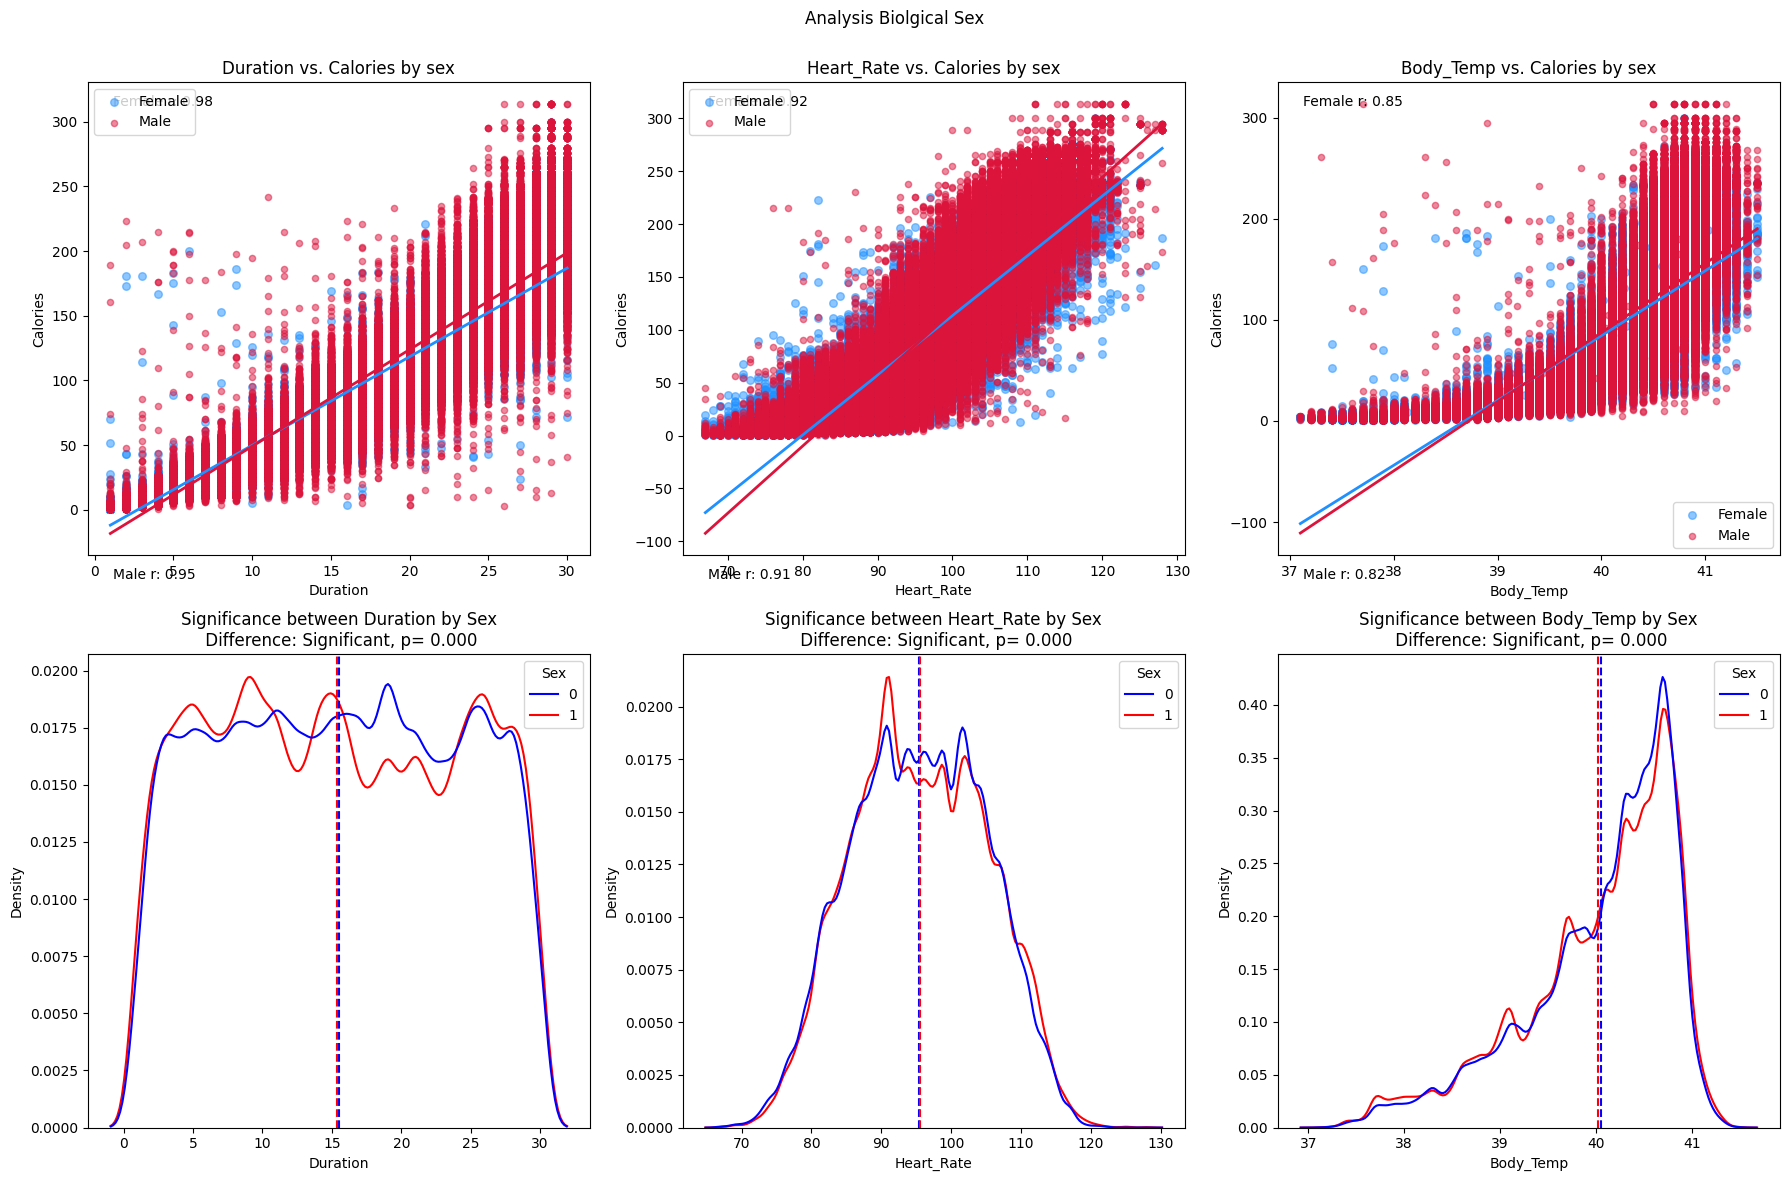

In [ ]:
#Visualization and Statistical Analysis Biolgical Sex

fig, axes = plt.subplots(2, 3,figsize=(18,12))
fig.suptitle("Analysis Biolgical Sex")

predictors = ['Duration', 'Heart_Rate',	'Body_Temp']
sex_labels = ['Female', 'Male'] #female = 0, male = 1

for i, predictor in enumerate(predictors): 
    for sex in [0,1]:
        subset = df[df['Sex'] == sex]

        #regression plot
        sns.regplot(x=predictor, y='Calories', data=subset,
                    scatter_kws={'alpha': 0.5, 's': 20 if sex == 1 else 30},
                    line_kws={'linewidth': 2},
                    color='crimson' if sex else 'dodgerblue',  # hard to see without distinct colors
                    ax=axes[0,i],
                    label=sex_labels[sex]
                   )
        corr = subset[[predictor, 'Calories']].corr().iloc[0,1]
        axes[0,i].text(0.05,0.95 - 1*sex,f"{sex_labels[sex]} r: {corr:.2f}", transform=axes[0,i].transAxes,fontsize=10)

    axes[0,i].set_ylabel('Calories')
    axes[0,i].set_xlabel(predictor)
    axes[0,i].set_title(f"{predictor} vs. Calories by sex")
    axes[0,i].legend()

    #Distrbution Plots
    sns.kdeplot(data=df, x=predictor,hue= 'Sex', ax=axes[1,i], palette=['blue', 'red'])

    for sex in [0,1]:
        mean_val = df[df['Sex'] == sex][predictor].mean()

        axes[1,i].axvline(mean_val, color='red' if sex else 'blue', linestyle='--', linewidth=1.5)

    #t_test between 2 means
    t_stat, p_val = stats.ttest_ind(
            df[df['Sex'] == 0][predictor], #female
            df[df['Sex'] == 1][predictor], #male
    )
    significance = "Significant" if p_val < 0.05 else "Not Significant"

    axes[1,i].set_title(f"Significance between {predictor} by Sex\n Difference: {significance}, p= {p_val:.3f}")

plt.tight_layout()
plt.subplots_adjust(top=0.92)


# Neural Network

Knowing the distribution of the data. I will standardize my calories column and train a neural network with 4 features: Sex, Duration, Heart_rate, and Body_temp.

/tmp/ipykernel_31/799972081.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Calories'] = np.sqrt(male_df['Calories'])
/tmp/ipykernel_31/799972081.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Calories'] = np .sqrt(female_df['Calories'])
/tmp/ipykernel_31/799972081.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

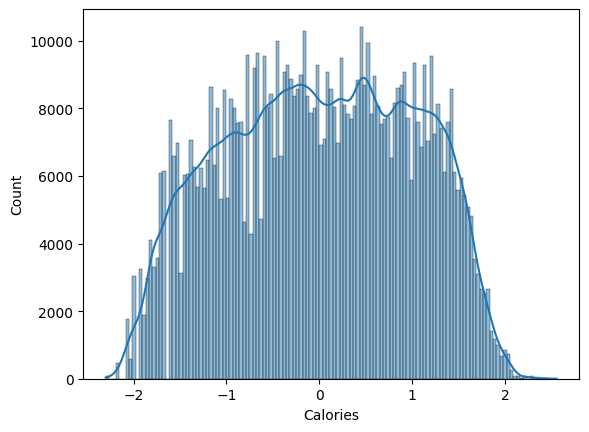

In [16]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

df_processing = df.copy()
#Seperate by Sex male = 1, female = 0
male_df = df_processing[df_processing['Sex'] == 1]
female_df = df_processing[df_processing['Sex'] == 0]

# Standard Scaler 
male_scaler = StandardScaler()
female_scaler = StandardScaler()

#Square root normalization
male_df['Calories'] = np.sqrt(male_df['Calories'])
female_df['Calories'] = np .sqrt(female_df['Calories'])

#Fit transform Target
male_df['Calories'] = male_scaler.fit_transform(male_df[['Calories']])
female_df['Calories'] = female_scaler.fit_transform(female_df[['Calories']])

df_processing = pd.concat([male_df,female_df])

def standardized_plot(df):

    fig, axes = plt.subplots()
    
    sns.histplot(df['Calories'], kde=True, ax=axes)
    plt.show()

def main():
    standardized_plot(df_processing)
    df_processing.head()
main()

# Neural Network

I will test the dataframe now

In [17]:
#Split the dataset
train, val, test = np.split(df_processing.sample(frac=1), [int(len(df_processing)*0.6), int(len(df_processing)*0.8)])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
#Resahping function for x and y 

import copy
def get_xy(dataframe, y_label, x_labels = None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
            
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X, y))
    return data, X, y

In [19]:
_, X_train_all, y_train_all = get_xy(train, 'Calories', x_labels=df_processing.columns[:4])
_, X_val_all, y_val_all = get_xy(val, 'Calories', x_labels=df_processing.columns[:4])
_, X_test_all, y_test_all = get_xy(test, 'Calories', x_labels=df_processing.columns[:4])

In [20]:
import tensorflow as tf

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'mean_squared_error', metrics=['mae'])

2025-05-26 02:48:43.406942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748227723.672884      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748227723.749107      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-26 02:48:59.812605: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor= 'val_mae',
    patience = 5,
    restore_best_weights =True
)
history = nn_model.fit(
    X_train_all,
    y_train_all,
    epochs=50,
    batch_size=64,
    validation_data=(X_val_all,y_val_all),
    callbacks=[early_stopping]
)

Epoch 1/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.2173 - mae: 0.1905 - val_loss: 0.0275 - val_mae: 0.1294
Epoch 2/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0311 - mae: 0.1357 - val_loss: 0.0387 - val_mae: 0.1628
Epoch 3/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0253 - mae: 0.1209 - val_loss: 0.0310 - val_mae: 0.1423
Epoch 4/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0225 - mae: 0.1129 - val_loss: 0.0205 - val_mae: 0.1058
Epoch 5/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0213 - mae: 0.1092 - val_loss: 0.0200 - val_mae: 0.1048
Epoch 6/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0212 - mae: 0.1084 - val_loss: 0.0214 - val_mae: 0.1094
Epoch 7/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0209 - mae: 0.1076 - val_loss: 0.0206 - val_mae: 0.1068
Epoch 8/50
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0208 - mae: 0.1074 - val_loss: 0.0214 - val_mae: 0.1080
Epoch 9/50
7032/7032 ━━━━━━━━━━━

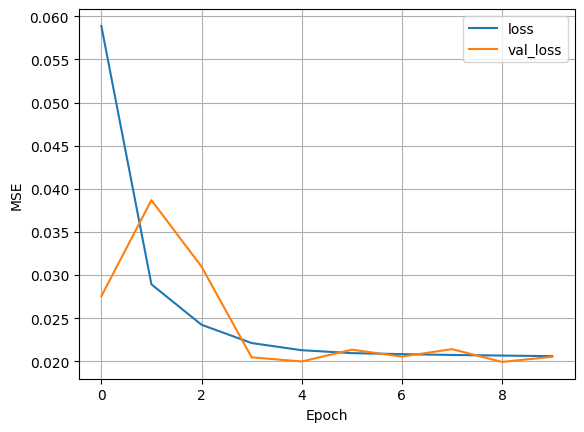

In [22]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [23]:
# Testing on the test dataset

test_loss, test_mae = nn_model.evaluate(X_test_all, y_test_all)
print(f"Test loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0201 - mae: 0.1050
Test loss: 0.0201
Test MAE: 0.1047


In [ ]:
random_input = np.array([[
    0,      # Sex: 1 = Male, 0 = Female
    18,   # Duration: 45.5 minutes of exercise
    92,    # Heart Rate: 145 BPM
    40.5    # Body Temperature: 0	18.0	92.0	40.5	96.0
]])

print("Random input:")
print(f"Sex: {'Male' if random_input[0,0] == 1 else 'Female'}")
print(f"Duration: {random_input[0,1]} minutes")
print(f"Heart Rate: {random_input[0,2]} BPM") 
print(f"Body Temp: {random_input[0,3]}°F")

# Get prediction 
prediction_normalized = nn_model.predict(random_input)


if random_input[0,0] == 1:  # Male
    prediction_sqrt = male_scaler.inverse_transform(prediction_normalized.reshape(-1,1))
    prediction_calories = prediction_sqrt ** 2
else:  # Female  
    prediction_sqrt = female_scaler.inverse_transform(prediction_normalized.reshape(-1,1))
    prediction_calories = prediction_sqrt ** 2

print(f"\nPredicted calories burned: {prediction_calories[0,0]:.1f} calories")

Random input:
Sex: Female
Duration: 18.0 minutes
Heart Rate: 92.0 BPM
Body Temp: 40.5°F
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Predicted calories burned: 85.8 calories
